#CIFAR-10 Image Classification Using Convolutional Neural Networks (CNNs)

#Introduction
In this project, we developed a Convolutional Neural Network (CNN) to classify images from the
CIFAR-10 dataset. This dataset consists of 60,000 32x32 color images in 10 different classes, with
6,000 images per class. The primary objective of this project was to demonstrate the application of
CNNs in image classification tasks.

In [19]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

# Dataset Description
The CIFAR-10 dataset contains 10 different classes: airplanes, cars, birds, cats, deer, dogs, frogs,
horses, ships, and trucks. Each class has 6,000 images, split into 50,000 training images and
10,000 testing images.


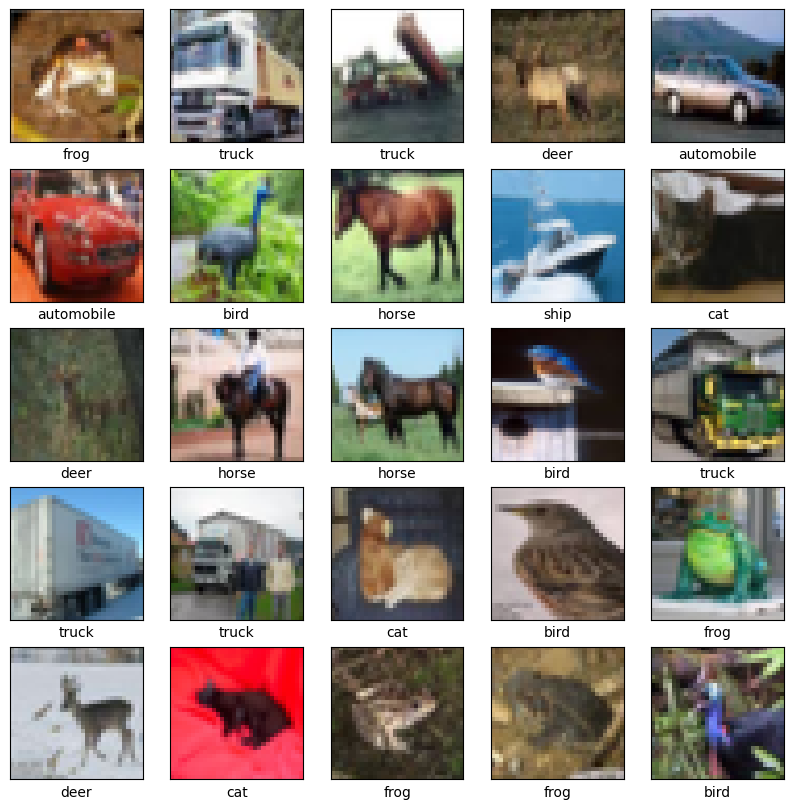

In [20]:
#Load the dataset
(train_images,train_labels), (test_images,test_labels) = cifar10.load_data()

#Display few images and their labels
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

#DATA PREPARATION

The picture pixel values will be normalised to fall between 0 and 1. Our neural networks' training efficiency and convergence are enhanced by this preprocessing stage.


In [21]:
#Normalize the images to a range of 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

#Check the shape of the data
print(f'Train images shape: {train_images.shape}, Training labels shape: {train_labels.shape}')
print(f'Test images shape: {test_images.shape}, Testing labels shape: {test_labels.shape}')

Train images shape: (50000, 32, 32, 3), Training labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3), Testing labels shape: (10000, 1)


#Building a Convolutional Neural Network(CNN)

Using TensorFlow, we will construct a CNN to categorise the CIFAR-10 pictures. Given its ability to automatically extract pertinent information from images, a CNN is especially well-suited for tasks involving the classification of images.


In [22]:
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

#Compile the model
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

#Display the architecture
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 1024)             

#Training the CNN

In order to help the CNN understand and identify patterns in the CIFAR-10 images, we will train it for ten epochs.
In order to minimise the loss, the parameters of the model are adjusted once the training data is fed into it.


In [23]:
cnn_history = cnn_model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 79s 50ms/step - loss: 1.5048 - accuracy: 0.4507 - val_loss: 1.2889 - val_accuracy: 0.5458
Epoch 2/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.1393 - accuracy: 0.5953 - val_loss: 1.0578 - val_accuracy: 0.6351
Epoch 3/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.9878 - accuracy: 0.6541 - val_loss: 0.9474 - val_accuracy: 0.6717
Epoch 4/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.8936 - accuracy: 0.6872 - val_loss: 0.9271 - val_accuracy: 0.6762
Epoch 5/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.8165 - accuracy: 0.7156 - val_loss: 0.9016 - val_accuracy: 0.6894
Epoch 6/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.7582 - accuracy: 0.7343 - val_loss: 0.8910 - val_accuracy: 0.6944
Epoch 7/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7000 - accuracy: 0.7520 - val_loss: 0.8561 -

#Evaluating the CNN

We assess the CNN's performance on the test set after training. To further illustrate the learning process, we will depict the accuracy and loss during training and validation over epochs.


313/313 - 4s - loss: 0.9314 - accuracy: 0.7106 - 4s/epoch - 13ms/step

Test accuracy: 0.7106000185012817


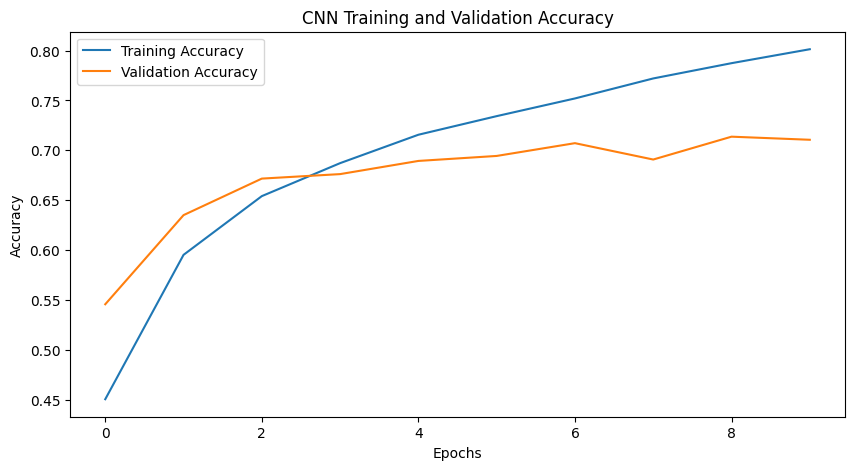

In [24]:
#Evaluaate the CNN
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(test_images,test_labels, verbose=2)
print(f'\nTest accuracy: {cnn_test_acc}')

#Plot training and validation accuracy
plt.figure(figsize=(10,5))
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

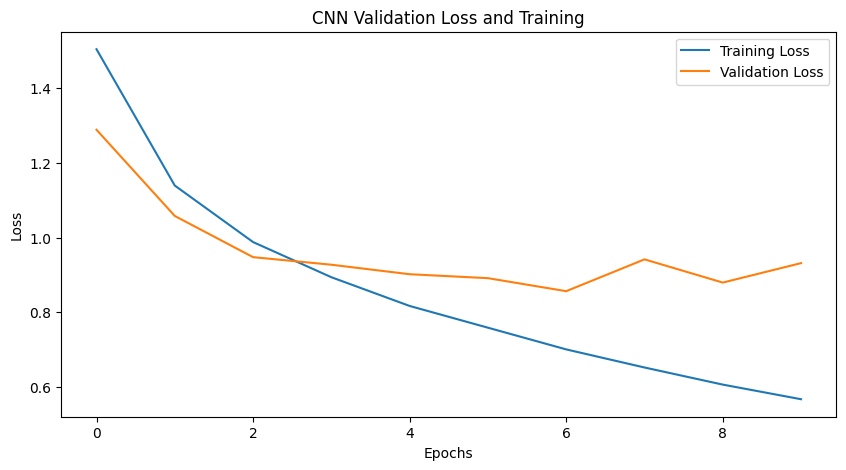

In [25]:
#Plot validation loss and training
plt.figure(figsize=(10,5))
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'],label='Validation Loss')
plt.title("CNN Validation Loss and Training")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Conclusion

In order to categorise photos from the CIFAR-10 dataset, we built a Convolutional Neural Network (CNN) in this notebook using TensorFlow. We went over how to load the dataset, prepare the data, construct the CNN, train the model, and assess its effectiveness. This example shows how well CNNs perform image classification jobs by identifying different items in photos. CNNs are strong tools for this kind of work. Experimenting with various architectures, hyperparameters, and data augmentation methods can lead to further advancements.
